In [1]:
import convexgating as cg
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import datetime
import os
import re

In [2]:
#convexgating==0.1.1 #branch add_parameter_option
#see 01_get_data.ipynb

In [3]:
pre = 'COV01_get_data'
start_time = hr.get_time()
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

path exists


In [4]:
sc.logging.print_versions()
sc.settings.verbosity = 3 
#now = datetime.datetime.now()
#today = now.strftime("%Y%m%d")

-----
anndata     0.10.5.post1
scanpy      1.9.6
-----
PIL                         10.3.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.1
brotli                      1.0.9
certifi                     2023.11.17
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.0
convexgating                NA
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.0
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
get_annotations             NA
h5py                        3.11.0
helper_reproducibility      NA
idna                        3.6
ipykern

In [5]:
df_anno = pd.read_csv(os.path.join(path_input_data,"data_Tcells_annotated.csv.gz"), compression='gzip')

In [6]:
df_anno.head()

,cellid,Run,FCS.Filename,id,Individuals,Group,Severity,Disease.phase,max. WHO scale,sev_merge,...,IgD,IgM,Tcellcompartment,pheno_acute,metacluster_num,metacluster_name,new_clust_name,new_clust_num,UMAP1,UMAP2
0,2,210130,210130_Blut_Panel1_CV19_BC_9_viable.fcs,"CV-284, week 6",CV-284,CV19,mild,convalescent,2.0,mild,...,3.507821,15.367002,CD4+,NaN,NaN,NaN,NaN,NaN,1.483736,-0.659450
1,4,210130,210130_Blut_Panel1_CV19_BC_9_viable.fcs,"CV-284, week 6",CV-284,CV19,mild,convalescent,2.0,mild,...,0.886470,12.608067,CD8+,NaN,NaN,NaN,NaN,NaN,2.333084,-6.212416
2,12,210130,210130_Blut_Panel1_CV19_BC_9_viable.fcs,"CV-284, week 6",CV-284,CV19,mild,convalescent,2.0,mild,...,0.000000,1.854850,CD4+,NaN,NaN,NaN,NaN,NaN,-3.276101,-5.658602
3,14,210130,210130_Blut_Panel1_CV19_BC_9_viable.fcs,"CV-284, week 6",CV-284,CV19,mild,convalescent,2.0,mild,...,1.357457,0.000000,CD4+,NaN,NaN,NaN,NaN,NaN,-2.068011,-5.061034
4,26,210130,210130_Blut_Panel1_CV19_BC_9_viable.fcs,"CV-284, week 6",CV-284,CV19,mild,convalescent,2.0,mild,...,0.000000,9.726293,CD4+,NaN,NaN,NaN,NaN,NaN,3.178484,-2.645567


In [7]:
df_anno[['Tcellcompartment', 'new_clust_name',
       'new_clust_num']].value_counts()

Tcellcompartment  new_clust_name                     new_clust_num
CD4+              CD38+                              C4               107566
                  CD226+CD25+                        C9                82698
                  CD25+                              C5                81464
CD8+              CD38+                              C24               81410
CD4+              CD226+CD25+CD11c+                  C16               72255
CD8+              PD1+TIGIT+CD137+                   C29               68770
                  CD25+                              C27               62627
CD4+              CD226+CD25+KLRB1+                  C10               55971
CD8+              CD226+LAG3+TIGIT+KLRG1+            C33               55777
CD4+              Treg-like                          C2                48773
                  CD226+CD25+CD11c+                  C11               48158
                  CD226+PD1+                         C15               48033
         

In [8]:
var_names = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']
adata_anno = ann.AnnData(X=df_anno[var_names], obs= df_anno[['cellid', 'Run', 'FCS.Filename', 'id', 'Individuals', 'Group',
       'Severity', 'Disease.phase', 'max. WHO scale', 'sev_merge',
       'Days.post.symptom.onset', 'Week', 'sev_week', 'followup', 'Tcellcompartment',
       'pheno_acute', 'metacluster_num', 'metacluster_name', 'new_clust_name',
       'new_clust_num']]) 

In [9]:
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']

In [10]:
adata_CV19.obs['Tcellcompartment'].value_counts()

CD4+      740925
CD8+      357679
TCRgd+     25228
Name: Tcellcompartment, dtype: int64

In [11]:
cofactor = 5
adata_anno.X = adata_anno.X/cofactor
adata_anno.X = np.arcsinh(adata_anno.X)

In [12]:
adata_anno.obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1784722', '1784723', '1784724', '1784725', '1784726', '1784727',
       '1784728', '1784729', '1784730', '1784731'],
      dtype='object', length=1784732)

In [13]:
df_umap = df_anno[['UMAP1', 'UMAP2']]
df_umap.index = adata_anno.obs_names

In [14]:
adata_anno.obsm['X_umap'] = df_umap.to_numpy()

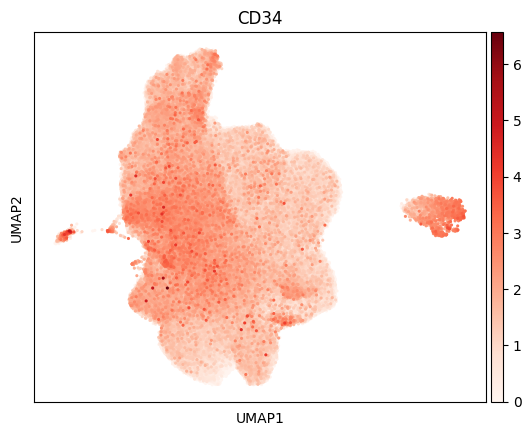

In [15]:
sc.pl.umap(adata_anno, color='CD34', size=20, cmap='Reds')

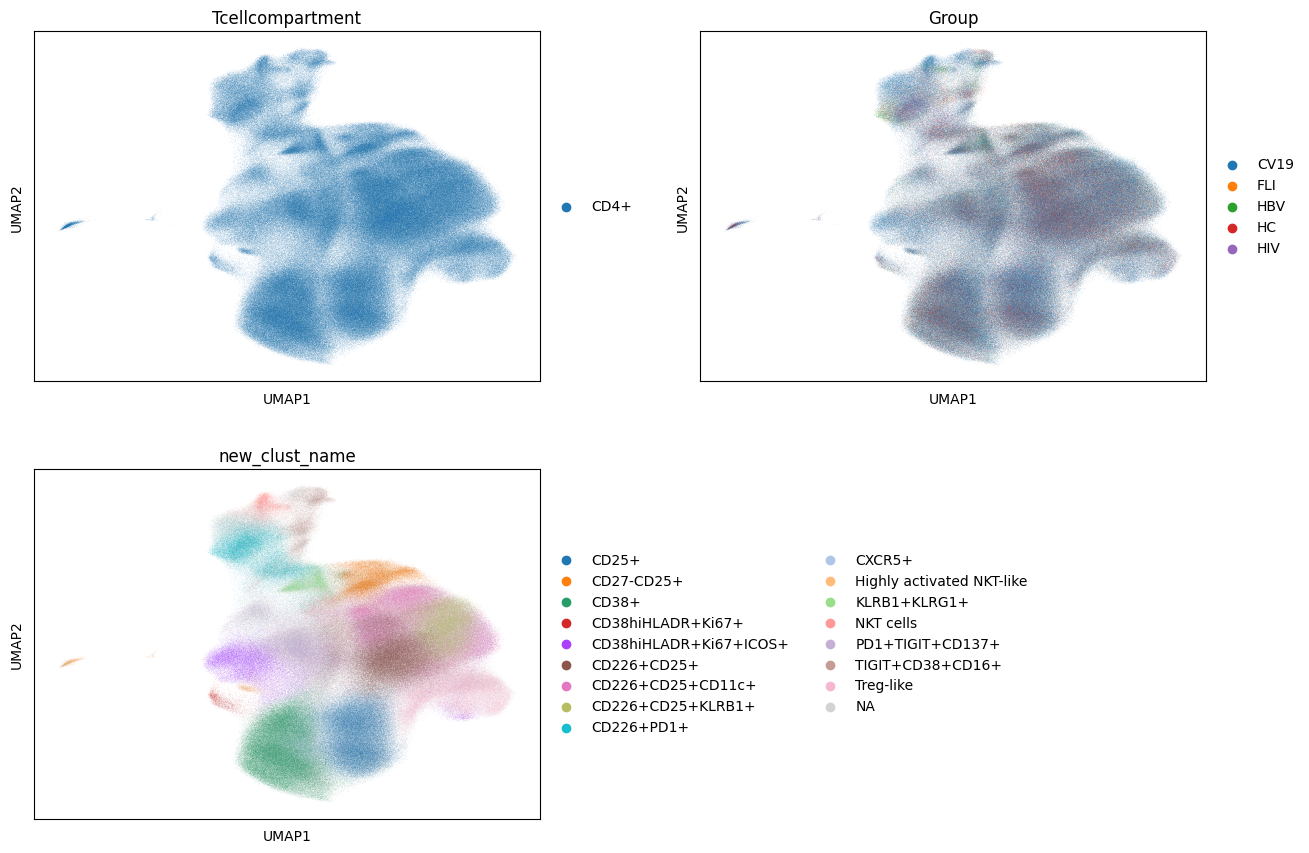

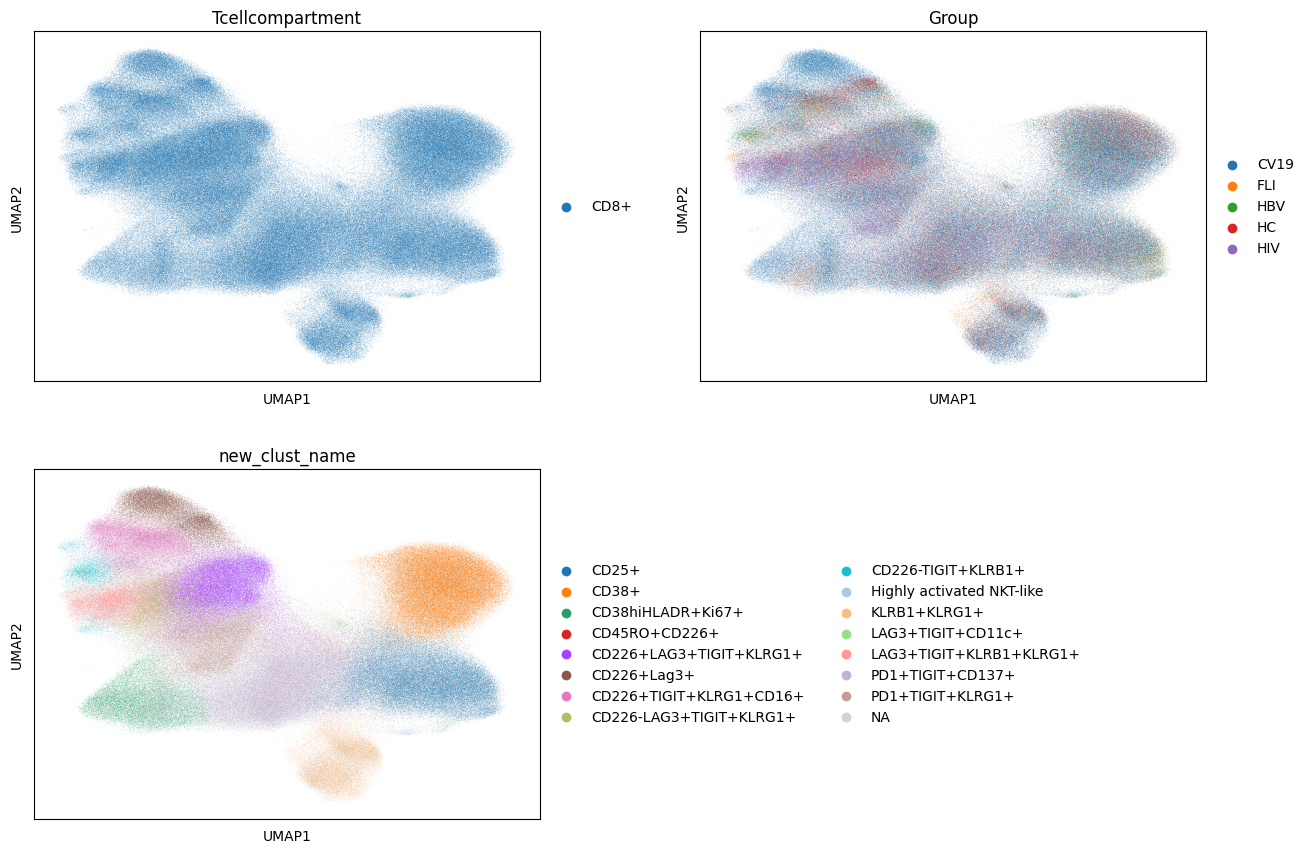

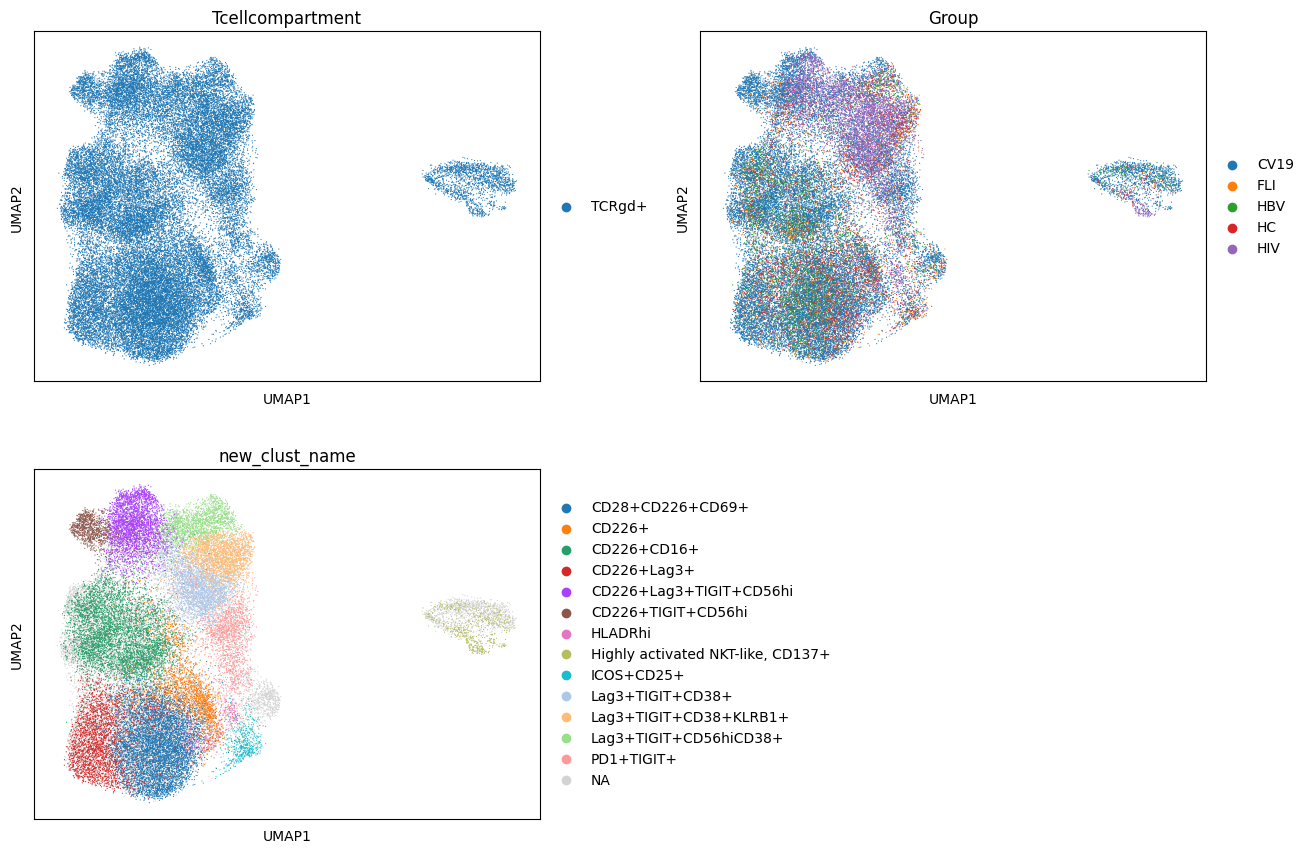

In [16]:
for comp in adata_anno.obs['Tcellcompartment'].cat.categories:
    adata_tmp= adata_anno[adata_anno.obs['Tcellcompartment']==comp].copy()
    sc.pl.umap(adata_tmp, color=['Tcellcompartment','Group', 'new_clust_name'],wspace =0.2, ncols=2)

In [17]:
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']
adata_CV19_CD4 = adata_CV19[adata_CV19.obs['Tcellcompartment'] == 'CD4+']
adata_CV19_CD8 = adata_CV19[adata_CV19.obs['Tcellcompartment'] == 'CD8+']
adata_CV19_CD4.obs['new_clust_num'].value_counts()

C4     59638
C5     50229
C9     38005
C16    31658
C10    27680
C2     25981
C7     25951
C11    24126
C17    19993
C15    18386
C6     18139
C18    13769
C12     7638
C1      7380
C19     7360
C14     6278
C8      2287
C3      1482
C13      750
Name: new_clust_num, dtype: int64

## For paper

#### Plot CD4 compartment

In [18]:
adata_CV19_CD4.obs['CD4_compartment_coloring'] = np.where(adata_CV19_CD4.obs['new_clust_num'].isin(['C7','C8']),
                                                          adata_CV19_CD4.obs['new_clust_num'], 'other')
palette={'C7': 'darkorange', 'C8': 'darkgreen', 'other': 'lightgrey'}

<Figure size 640x480 with 0 Axes>

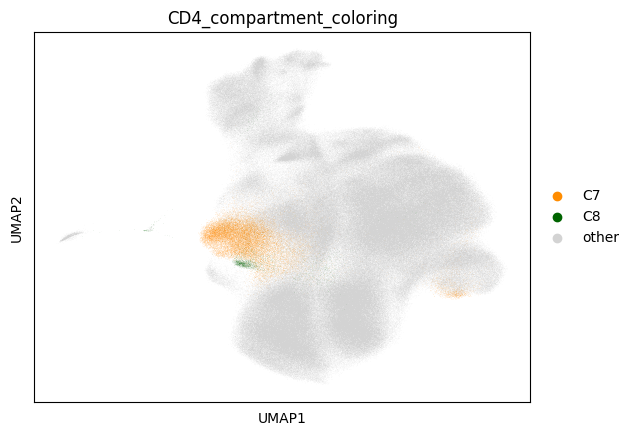

In [19]:
hr.umap_plot(adata=adata_CV19_CD4,
             base_plots_path = path_output_script,
             plot_name = pre + '_CD4_compartment_C7_C8.pdf',
            show_in_nb = True,
            frameon = True,
            color = 'CD4_compartment_coloring',
            palette = palette)

<Figure size 640x480 with 0 Axes>

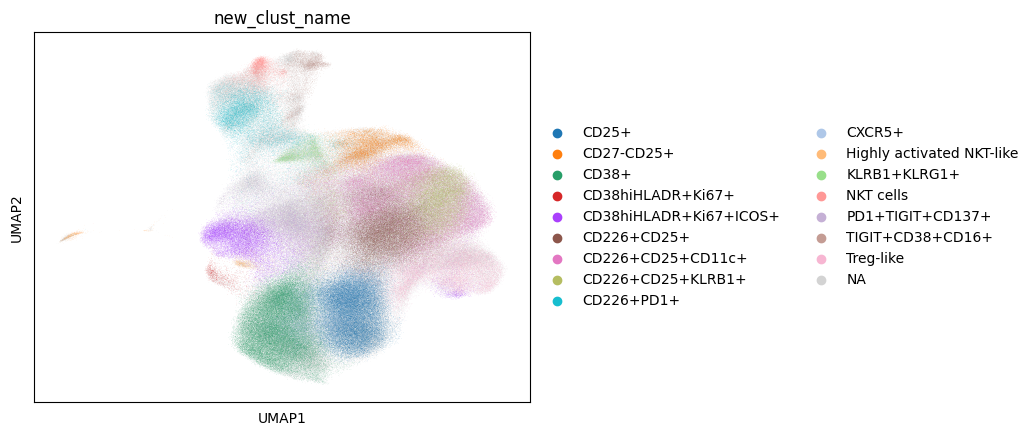

In [20]:
hr.umap_plot(adata=adata_CV19_CD4,
             base_plots_path = path_output_script,
             plot_name = pre + '_CD4_new_clustname.pdf',
            show_in_nb = True,
            frameon = True,
            color = 'new_clust_name')

#### Plot CD8 compartment

In [21]:
adata_CV19_CD8.obs['CD8_compartment_coloring'] = np.where(adata_CV19_CD8.obs['new_clust_num'].isin(['C25','C26']),
                                                          adata_CV19_CD8.obs['new_clust_num'], 'other')
palette={'C25': 'red', 'C26': 'darkblue', 'other': 'lightgrey'}

<Figure size 640x480 with 0 Axes>

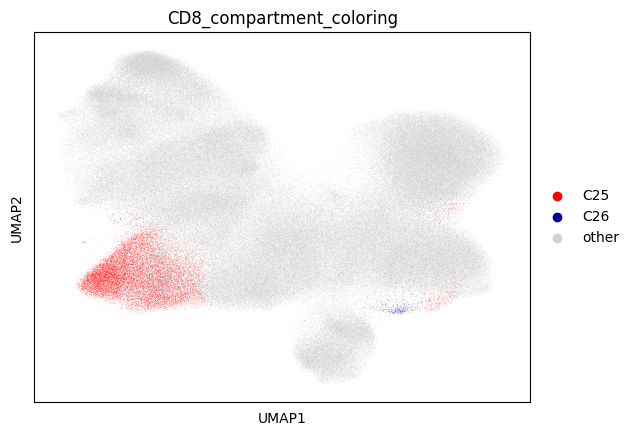

In [22]:
hr.umap_plot(adata=adata_CV19_CD8,
             base_plots_path = path_output_script,
             plot_name = pre + '_CD8_compartment_C25_C26.pdf',
            show_in_nb = True,
            frameon = True,
            color = 'CD8_compartment_coloring',
            palette = palette)

<Figure size 640x480 with 0 Axes>

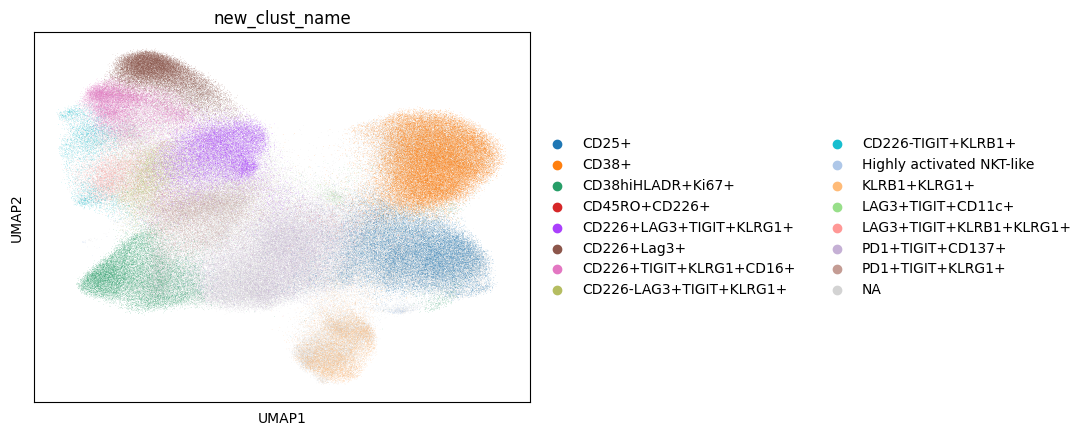

In [23]:
hr.umap_plot(adata=adata_CV19_CD8,
             base_plots_path = path_output_script,
             plot_name = pre + '_CD8_new_clustname.pdf',
            show_in_nb = True,
            frameon = True,
            color = 'new_clust_name')

## Save session

In [24]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=372, microseconds=851349)